In [22]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import Transaction_Encoder


ImportError: cannot import name 'Transaction_Encoder' from 'mlxtend.preprocessing' (C:\Users\megha.gaikwad\Anaconda3-32bit\lib\site-packages\mlxtend\preprocessing\__init__.py)

In [23]:
Movies = pd.read_csv("my_movies.csv")
Movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [24]:
#preprocessing

df=pd.get_dummies(Movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [25]:
#Apriori Algorithm
frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot..."
1393,0.1,"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot..."
1394,0.1,"(V1_Sixth Sense, V2_LOTR1, V3_Harry Potter1, V..."
1395,0.1,"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot..."


In [26]:
rules = association_rules(frequent_itemsets,metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64248,(Green Mile),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V4_Green Mile),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR2),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [27]:
rules.sort_values('lift',ascending= False)[0:20]
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64248,(Green Mile),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V4_Green Mile),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR2),"(V1_Sixth Sense, V2_LOTR1, LOTR1, V3_Harry Pot...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

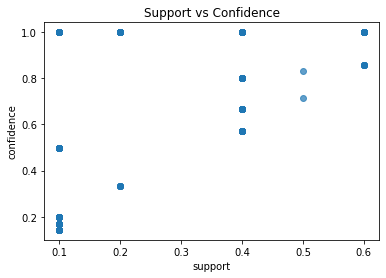

In [29]:
#Visualizing results
#Support vs Confidence

plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

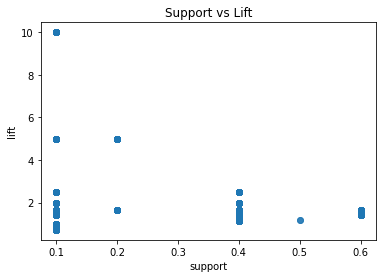

In [30]:
plt.scatter(rules['support'], rules['lift'], alpha=0.7)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

Text(0.5, 1.0, 'Lift vs Confidence')

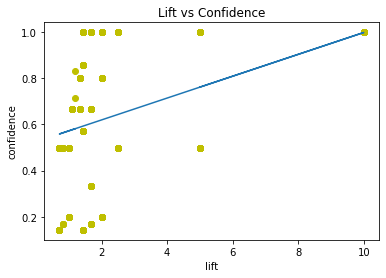

In [33]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')

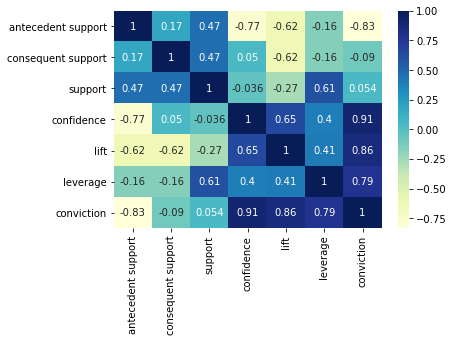

In [34]:
# Visualizing the data using heatmap
sns.heatmap(rules.corr(), cmap="YlGnBu", annot = True)
plt.show()